<a href="https://colab.research.google.com/github/iamprakhar004/Background-changer_Project/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df=pd.read_csv('hitewite.csv')

In [7]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Text(0.5, 1.0, 'Calculated-BMI')

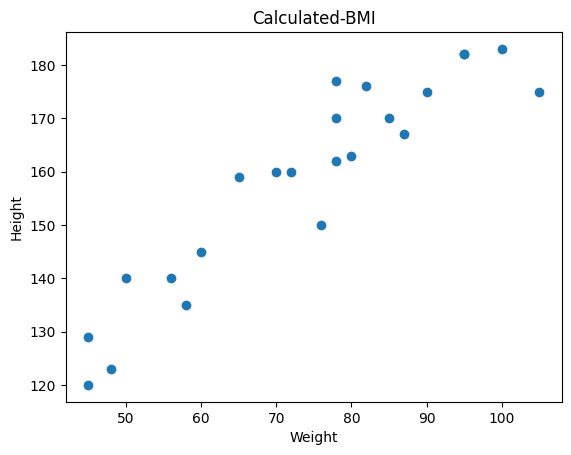

In [21]:
##Scatter Plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title("Calculated-BMI")

In [22]:
##TO check wether the relation b/w hight and weight is positive/negative use correlation..
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [23]:
##For Visualization..
import seaborn as sns

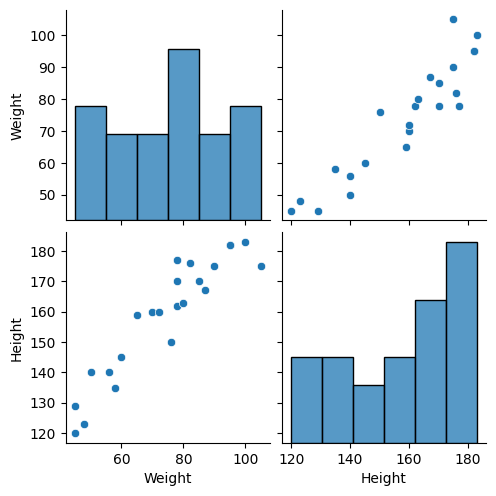

In [24]:
sns.pairplot(df)

In [39]:
##Divide independent and dependent features...
X=df[['Weight']] ##iNDEPENDENT FEATURES SHOULD ALWAYS BE DATAFRAME OR 2 DIM ARRAY
X.head()
Y=df['Height']  ##DEPENDENT FEATURES SHOULD ALWAYS BE series OR 1 DIM ARRAY..
Y
# np.array(X).shape

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [37]:
X_series=df['Weight']
X_series.head()
# np.array(X).shape

,Weight
0,45
1,58
2,48
3,60
4,70


In [40]:
np.array(Y).shape

(23,)

In [44]:
##Train Test Split...
from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
X_train.shape

(17, 1)

In [48]:
##Standardization- Taking all the i/p or independent features and applying Z-Score and this will convert all values with mean=0 and std.dev=1;
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



In [49]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [50]:
##aPPLYING lINEAR REGRESSION...
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)
lr.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [55]:
print("Coefficient/slope is",lr.coef_)    ##This is slope and it is 1 it is because we have only one independent fearture... (y=Bo+BiXi and this slope is Bi)
print("intercept is",lr.intercept_)

Coefficient/slope is [17.2982057]
intercept is 156.47058823529412


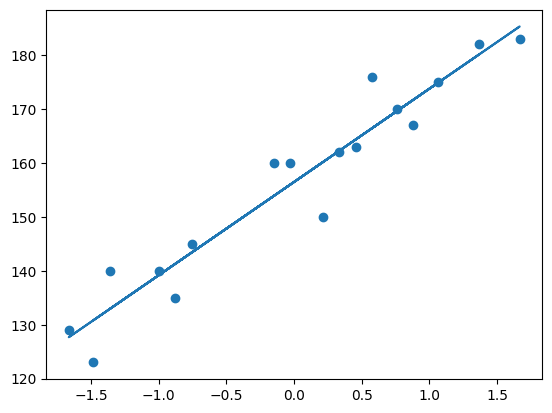

In [57]:
# plot trainig data wrt best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,lr.predict(X_train))

In [59]:
y_pred=lr.predict(X_test)

In [60]:
##Performance matrix...
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [61]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


##R-Squared Formula:
R2=1-SSR/SST.

R^2=COEFFCIENT OF DETERMINATION
SSR=SUM OF SQUARE OF RESIDUAL
SST=TOTAL SUM OF SQUARE.

In [62]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)

0.7360826717981276


In [63]:
##OLS Linear Regression...
import statsmodels.api as sm

In [64]:
model=sm.OLS(Y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [65]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                       0.664
Time:                        06:46:47   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [68]:
##Prediction for new DATA...
lr.predict(sc.transform([[72]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])